# Módulo 20 - Algorítmo de classificação - Naive Bayes

Este é o projeto de conclusão do múdulo 20 do curso de ciência de dados da EBAC. Nosso objetivo nesse projeto é criar, treinar e testar a eficácia de um algorítmo de classicação Naive Bayes.

Utilizaremos como base para esse projeto, dados pré tratados, analisados e processados por nós durante o módulo 17 do curso, sendo assim, nosso foco será apenas o modelo em sí.

### Importação dos módulos

Antes de iniciamos o estudo, primeiramente iremos importar os módulos que serão usados no decorrer do projeto.

In [137]:
# Importando os módulos pertinentes ao projeto;
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings("ignore")

---
### Carregando os dados

Vamos agora, carregar os dados que iremos usar no modelo.

In [140]:
# Carregando as bases;
X_train, X_test = pd.read_csv("../dados/X_train_balanced"), pd.read_csv("../dados/X_test")
y_train, y_test = pd.read_csv("../dados/y_train_balanced"), pd.read_csv("../dados/y_test")

---
### Verificando o tamanho e balanceamento dos dados

Nós sabemos que os dados que estamos utilizando já foram balanceados anteriormente, porém, como boa prática, iremos novamente verificar o balanceamento da base de treino.

In [143]:
# Comparando os tamanhos das duas bases;
print(f"Formato da base X_train: {X_train.shape}\n"
      f"Formato da base y_train: {y_train.shape}")

Formato da base X_train: (252, 7)
Formato da base y_train: (252, 1)


Como podemos ver a cima, as duas bases são exatamente do mesmo tamanho. Vamos então verificar o balanceamento da variável dependente (credit_score).

In [145]:
# Verificando o balaceamento da variável dependente;
y_train.value_counts()

Credit Score_Encoded
0                       84
1                       84
2                       84
Name: count, dtype: int64

Podemos ver que os dados estão todos perfeitamente balanceados com o exato mesmo número de registro para cada uma das faixas de credito.

---
### Criação treinamento e teste do modelo

Agora que nos certificamos da qualidade dos dados, vamos iniciar a aplicação do modelo.

---
**Treinando o modelo**

Primeiramente vamos treinar o modelo a partir das bases de treino - obviamente.

In [151]:
# Stanciando o modelo Naive Bayes;
churn_naive = GaussianNB()

# Carregando os dados no modelo;
churn_naive.fit(X_train, y_train)

GaussianNB()

---
**Testando a precisão do modelo**

In [153]:
# Realizando as predições dentro da própria base de treino;
y_train_predicted = churn_naive.predict(X_train)

# Verificando a precisão do modelo para base de treino, comparando suas prediçõs com os valores já conhecidos de treino;
accuracy = accuracy_score(y_train, y_train_predicted)

print(f"Precisão do modelo: {accuracy:.3f}")

Precisão do modelo: 0.980


Podemos ver que o modelo alcançou uma precisão de 98% para os dados da base de treino, que é um valor extremamente alto de precisão. 

Nas próximas etapas verificaremos outras medidas, como por exemplo o recall, além de utilizarmos a matriz de confusão para termos uma melhor noção de em quais classes estão localizados a maior parte dos acertos do modelo (score baixo, score médio ou score alto). Mas vale lembrar que com nível de precisão tão alto, nós podemos inferir que a distribuição de acertos entre as classes certamente estará relativamente homogênea.

---
**Verificando a distribuição de acertos**

Vamos agora, utilizar uma matriz de confusão para entender em quais classes estão localizados o maior número de acertos do modelo.

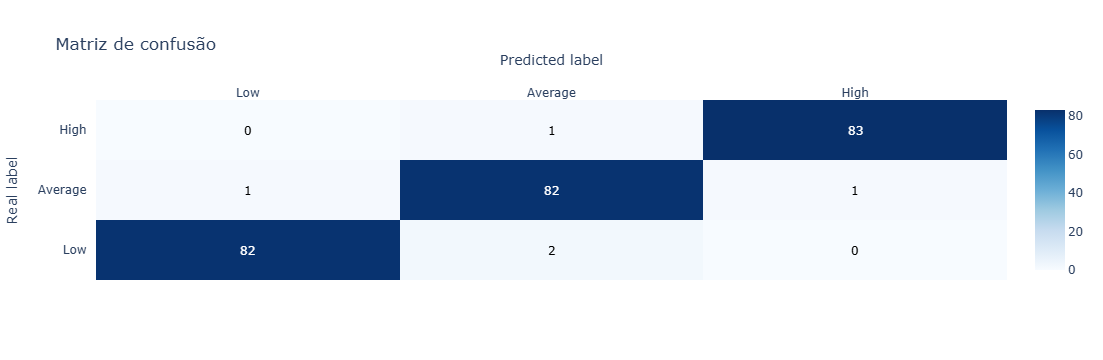

In [171]:
# Criando a matriz de confusão;
conf_matrix = confusion_matrix(y_train, y_train_predicted)

# Definindo as classes;
class_names = ["Low", "Average", "High"]

# Plotando a matriz de confusão;
fig = ff.create_annotated_heatmap(
    z=conf_matrix,
    x=class_names,
    y=class_names,
    colorscale="Blues",
    showscale=True
)

fig.update_layout(
    title="Matriz de confusão",
    xaxis_title="Predicted label",
    yaxis_title="Real label"
)
fig.show()

Observando a matriz de confusão nós confirmamos que de fato, os acertos estão muito bem distribuidos entre as classes (low, average e high). Foram poquíssimos erros cometidos, de modo que podemos até mesmo explicá-los individualmente. Em um deles o modelo classificou um cliente como "Average" enquanto na verdade, era "Low". Em outro momento, classificou um cliente como "High" e outros dois como "Low" quando na verdade, ambos eram "Average". E por fim, classificou um cliente "High" como sendo "Average".

Conforme o valor da accuracy já nos indicava, o modelo está muito bem adaptado aos dados, gerando uma precisão extramente alta em suas previsões.

---
**Recall**

Por fim, vamos agora calcular o valor do recall, para entendermos a proporção média dos acertos dentro de cada classe.

In [187]:
# Calculando o recall;
recall = recall_score(y_train, y_train_predicted, average="macro")
print(f"Recall médio entre as classes: {recall:.2f}")

Recall médio entre as classes: 0.98


Podemos a cima que o valor do recall média para classes é de 0.98, que indica uma precisão entre classes altíssima, conforme todos os indicadores anteriores já mostravam.

---
## Aplicação do modelo na base de teste

Vamos agora aplicar o modelo treinado na base de testes e verificar se o modelo desempenhará bem assim como durante a etapa de treinos.

**Calculos de precisão - Recall e Acurracy**

Iremos verificar agora a precisão do modelo para a base de testes, assim poderemos mensurar a capacidade de generalização do modelo a novos dados, e como consequência, identificar possíveis problemas de overfitting.

In [203]:
# Prevendo a variável dependente da base de teste;
y_test_predicted = churn_naive.predict(X_test)

# Calculando a precisão do modelo para a base de teste;
accuracy = accuracy_score(y_test, y_test_predicted)
recall = recall_score(y_test, y_test_predicted, average="macro")

print(f"Precisão do modelo: {accuracy:.3f}\n"
      f"Valor médio do recall: {recall:.3f}")

Precisão do modelo: 0.976
Valor médio do recall: 0.944


Observando os valores de accuracy e recall nós podemos ver que o modelo mantém altíssimos níveis tanto de precisão geral (accuracy), quanto de precisão entre as classes individuais (recall), o que demonstra uma boa adaptação aos dados, além disso, a consistência entre as observações da base de treino e de teste nos indica também que não houveram problemas com overfiting.

## Conclusão

Em fim, concluímos o projeto. Durante o projeto nós criamos, treinamos e aplicamos um modelo de regressão Naive Bayes a dados históricos relacionados a pontuação de crédito de usuários. 

* Começamos pela etapa de carregamento de dados, onde nós "importamos" os dados que tratamos durante o módulo 17 do curso. Após isso, realizamos uma breve verificação de compatibilidade de tamanhos entre a variável dependete e as variáveis independentes, além de verificarmos o balanceamento da variável dependente (obs: nós já sabíamos que os dados estavam bem padronizados e balanceados, porém, decidi realizar essa etapa como exercício de fixação).

* Após isso, treinamos um modelo de classificação Naive Bayes com a base de dados de treino, carregada anteriormente. Após treinarmos o modelo, realizamos uma classificação dentro da própria base de treino, para termos uma referência de comparação entre a acuracia para a base de treino e a base de testes.

* Em seguida, calculamos o valor do recall, para entendermos a precisão do modelo para cada classe individual (obs: utilizamos o valor de recall médio das classes).

* Depois disso, plotamos uma matriz de confusão para exemplificar de forma visual a precisão do modelo entre as classes, exibindo de forma simples e detalhada onde ocorreram os erros.

* E por fim, realizamos todo o processo descrito anteriormente na base de testes, e então, comparamos os resultados para por a prova a capacidade de adaptação do modelo a novos dados.